### Dependencies

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import sys
import warnings

# Regex
import re

# NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# TextBlob
from textblob import TextBlob

import tensorflow as tf
from tensorflow.keras import datasets, preprocessing, models, layers,regularizers

if not sys.warnoptions:
    warnings.simplefilter("ignore")

print(tf.__version__)

2.4.1


In [3]:
# Import

In [4]:
music_df = pd.read_csv("../api/data/lyrics_etl.csv")
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,42YNobZ4HN3tRVEA47wLT6,When I'm Gone,2021-08-03T13:13:20.649Z,"Intro\nYeah, it's my life\nIn my own words, I ..."
1,1,1jlnBQGP2DtSEhMgQaz7a7,Haute (feat. J Balvin & Chris Brown),2021-08-03T12:58:47.598Z,"Intro: Tyga\nMake it hot, yeah\nMake it hot\n\..."
2,2,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,2021-08-03T11:16:59.439Z,Produced by Kanye West and Jon Brion\n\nIntro:...
3,3,35RJhm1pEovTBwnNR0zWad,GREECE (feat. Drake),2021-08-03T03:33:19.241Z,Intro: DJ Khaled\nWe The Best Music\nAnother o...
4,4,3keUgTGEoZJt0QkzTB6kHg,Truffle Butter,2021-08-03T03:29:39.523Z,"Chorus: Maya Jane Coles\nYou know, don't you?\..."


### Regex Cleaning

In [5]:
def html_cleaner (string):
    html_cleaner = re.sub(r'\n', " ", string)
    return html_cleaner

In [6]:
music_df['lyrics'] = music_df.lyrics.apply(html_cleaner)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,42YNobZ4HN3tRVEA47wLT6,When I'm Gone,2021-08-03T13:13:20.649Z,"Intro Yeah, it's my life In my own words, I gu..."
1,1,1jlnBQGP2DtSEhMgQaz7a7,Haute (feat. J Balvin & Chris Brown),2021-08-03T12:58:47.598Z,"Intro: Tyga Make it hot, yeah Make it hot Ver..."
2,2,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,2021-08-03T11:16:59.439Z,Produced by Kanye West and Jon Brion Intro: J...
3,3,35RJhm1pEovTBwnNR0zWad,GREECE (feat. Drake),2021-08-03T03:33:19.241Z,Intro: DJ Khaled We The Best Music Another one...
4,4,3keUgTGEoZJt0QkzTB6kHg,Truffle Butter,2021-08-03T03:29:39.523Z,"Chorus: Maya Jane Coles You know, don't you? Y..."


### Tokenization

In [9]:
# Donwload tokenizer from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pierre-
[nltk_data]     olivierboisvert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def tokenizer (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [14]:
music_df['lyrics'] = music_df['lyrics'].apply(tokenizer)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,42YNobZ4HN3tRVEA47wLT6,When I'm Gone,2021-08-03T13:13:20.649Z,"[Intro, Yeah, it, s, my, life, In, my, own, wo..."
1,1,1jlnBQGP2DtSEhMgQaz7a7,Haute (feat. J Balvin & Chris Brown),2021-08-03T12:58:47.598Z,"[Intro, Tyga, Make, it, hot, yeah, Make, it, h..."
2,2,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,2021-08-03T11:16:59.439Z,"[Produced, by, Kanye, West, and, Jon, Brion, I..."
3,3,35RJhm1pEovTBwnNR0zWad,GREECE (feat. Drake),2021-08-03T03:33:19.241Z,"[Intro, DJ, Khaled, We, The, Best, Music, Anot..."
4,4,3keUgTGEoZJt0QkzTB6kHg,Truffle Butter,2021-08-03T03:29:39.523Z,"[Chorus, Maya, Jane, Coles, You, know, don, t,..."


In [16]:
# Remove comma
music_df['lyrics'] = music_df['lyrics'].apply(lambda x: " ".join(x))
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,42YNobZ4HN3tRVEA47wLT6,When I'm Gone,2021-08-03T13:13:20.649Z,Intro Yeah it s my life In my own words I gues...
1,1,1jlnBQGP2DtSEhMgQaz7a7,Haute (feat. J Balvin & Chris Brown),2021-08-03T12:58:47.598Z,Intro Tyga Make it hot yeah Make it hot Verse ...
2,2,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,2021-08-03T11:16:59.439Z,Produced by Kanye West and Jon Brion Intro Jam...
3,3,35RJhm1pEovTBwnNR0zWad,GREECE (feat. Drake),2021-08-03T03:33:19.241Z,Intro DJ Khaled We The Best Music Another one ...
4,4,3keUgTGEoZJt0QkzTB6kHg,Truffle Butter,2021-08-03T03:29:39.523Z,Chorus Maya Jane Coles You know don t you Yeah...


### Stop Words

In [17]:
nltk.download('stopwords') #stopwords

[nltk_data] Downloading package stopwords to /Users/pierre-
[nltk_data]     olivierboisvert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'shouldn', 'll', "shan't", 'i', 'during', 'is', 'about', "haven't", 'was', 'wouldn', 'them', "isn't", 'ours', "weren't", 'mustn', 'as', 'me', 'were', 'd', 'you', 'am', 'nor', 'not', 'haven', "don't", 'it', 'hasn', 'while', 'if', 'and', "doesn't", 'what', 'such', 'hers', 'ourselves', 'its', 'did', 'yourself', 'on', 'both', 'too', 'her', "she's", 'we', 'up', "shouldn't", 'there', "that'll", 'yourselves', "you'll", "hadn't", 'herself', 'few', 'where', 'my', 'him', 'are', 'myself', "you've", 'having', 'wasn', 'some', 'theirs', 'at', "mustn't", 'needn', 'but', 'should', 'couldn', 'then', "needn't", 'most', 'doing', 'only', "won't", 'again', 'm', 'out', "mightn't", 'yours', 't', "hasn't", 'that', 'now', 'or', 'shan', 'to', 'those', 'each', 'mightn', "you'd", 'being', 'will', 'under', 'against', 'with', 'more', 'no', "wouldn't", 'doesn', 'how', 's', 'does', 'have', 'other', 'these', 'his', 'own', 've', 'weren', 'over', 'has', 'she', 'themselves', 'for', 'the', 'than', 'down', 'our', 'ma', 'y

In [20]:
music_df.lyrics = music_df.lyrics.apply(lambda x: x.split(" "))

In [21]:
def stop_words (data):
    stop_words = set(stopwords.words('english'))
    stop_words_list = []
    for string in data:
        if string not in stop_words:
            stop_words_list.append(string)
    return " ".join(stop_words_list)

In [22]:
music_df.lyrics = music_df.lyrics.apply(stop_words)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics
0,0,42YNobZ4HN3tRVEA47wLT6,When I'm Gone,2021-08-03T13:13:20.649Z,Intro Yeah life In words I guess Verse 1 Have ...
1,1,1jlnBQGP2DtSEhMgQaz7a7,Haute (feat. J Balvin & Chris Brown),2021-08-03T12:58:47.598Z,Intro Tyga Make hot yeah Make hot Verse 1 Tyga...
2,2,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,2021-08-03T11:16:59.439Z,Produced Kanye West Jon Brion Intro Jamie Foxx...
3,3,35RJhm1pEovTBwnNR0zWad,GREECE (feat. Drake),2021-08-03T03:33:19.241Z,Intro DJ Khaled We The Best Music Another one ...
4,4,3keUgTGEoZJt0QkzTB6kHg,Truffle Butter,2021-08-03T03:29:39.523Z,Chorus Maya Jane Coles You know Yeah Night You...


### Sentiment Analysis

In [25]:
my_test = "I love my wife"
blob = TextBlob(my_test)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /Users/pierre-
[nltk_data]     olivierboisvert/nltk_data...


True

In [29]:
intAnalyser = SentimentIntensityAnalyzer()
polarity = intAnalyser.polarity_scores(my_test)
polarity

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [30]:
def sentimentScore(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [32]:
music_df['sentiment_compound'] = music_df.lyrics.apply(sentimentScore)
music_df.head()

,Unnamed: 0,song_id,song_name,date_time_played,lyrics,sentiment_compound
0,0,42YNobZ4HN3tRVEA47wLT6,When I'm Gone,2021-08-03T13:13:20.649Z,Intro Yeah life In words I guess Verse 1 Have ...,0.6369
1,1,1jlnBQGP2DtSEhMgQaz7a7,Haute (feat. J Balvin & Chris Brown),2021-08-03T12:58:47.598Z,Intro Tyga Make hot yeah Make hot Verse 1 Tyga...,0.9169
2,2,1PS1QMdUqOal0ai3Gt7sDQ,Gold Digger,2021-08-03T11:16:59.439Z,Produced Kanye West Jon Brion Intro Jamie Foxx...,-0.4530
3,3,35RJhm1pEovTBwnNR0zWad,GREECE (feat. Drake),2021-08-03T03:33:19.241Z,Intro DJ Khaled We The Best Music Another one ...,0.9809
4,4,3keUgTGEoZJt0QkzTB6kHg,Truffle Butter,2021-08-03T03:29:39.523Z,Chorus Maya Jane Coles You know Yeah Night You...,0.9824


### Visualization

In [34]:
music_df.song_name.value_counts()

Gold Digger                              1
Dem Jeans                                1
Cotton Fields - Radio Mix                1
The Ride                                 1
GREECE (feat. Drake)                     1
Muerte                                   1
Eclipse                                  1
I'm Still Here - Winnie & Somow Remix    1
When I'm Gone                            1
Ass Drop                                 1
Truffle Butter                           1
Rave                                     1
Money Mouf                               1
The Hills                                1
Shakti Pan                               1
The Thrill                               1
Licht & Farben                           1
Soma                                     1
Krambambuli                              1
Mob Ties                                 1
Quarantine - Original                    1
Alone (feat. FEMME)                      1
Haute (feat. J Balvin & Chris Brown)     1
Kackvogel -

In [37]:
music_sent = music_df.groupby(['song_name'])['sentiment_compound'].mean().sort_values()
music_sent

song_name
Mob Ties                                -0.9993
Ass Drop                                -0.9980
Money Mouf                              -0.9898
The Hills                               -0.9792
Dem Jeans                               -0.9674
Gold Digger                             -0.4530
Soma                                    -0.3818
Alone (feat. FEMME)                     -0.2500
I'm Still Here - Winnie & Somow Remix    0.0000
Kackvogel - Original Mix                 0.0000
Krambambuli                              0.0000
Licht & Farben                           0.0000
The Ride                                 0.0000
Cotton Fields - Radio Mix                0.0000
Muerte                                   0.0000
Punxsutawney                             0.0000
Eclipse                                  0.0000
Rave                                     0.0000
Shakti Pan                               0.0000
Quarantine - Original                    0.3182
The Thrill                    

<AxesSubplot:xlabel='song_name'>

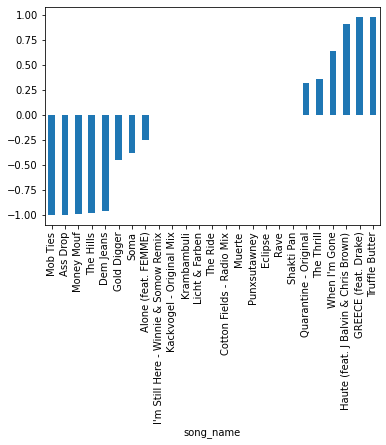

In [38]:
music_sent.plot(kind="bar")